#Zadanie 1a (3 pkt)
Celem zadania jest rozwiązanie problemu plecakowego dwoma metodami - brute force oraz według zadanej heurystyki. Należy zaimplementować metody klasy *KnapSack* - *solve_knapsack_brute_force* oraz *solve_knapsack_pw_ratio*. Poprzez rozwiązanie problemu rozumiemy podanie które przedmioty (indeksy w tablicy) należy spakować do plecaka oraz jaka jest sumaryczna wartość i masa plecaka. Punktacja wygląda następująco:


*   Rozwiązanie problemu metodą brute force. *Podpowiedź: do wygenerowania wszystkich permutacji można użyć funkcji product z biblioteki itertools* - **1.5 pkt**
*   Rozwiązanie problemu według heurystyki - do plecaka pakujemy przedmioty według stosunku wartości do wagi - **1 pkt**
*   Dla metody brute force proszę wygenerować wykres zależności czasu wykonywania metody od liczby elementów w tablicach *weights* i *profits* (do obu tablic należy stopniowo dopisywać po jednym elemencie, np. 10-krotnie, wartości elementów nie mają znaczenia). Proszę również odpowiedzieć na pytania (w osobnej komórce tekstowej) - czy obie metody mają takie same rozwiązania? Jakie są Pani / Pana wnioski? - **0.5 pkt**




In [2]:
import numpy as np
from itertools import product
import time
import matplotlib.pyplot as plt
from random import randint
!nvidia-smi

Thu Oct 12 09:05:58 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2070 S...    On | 00000000:01:00.0 Off |                  N/A |
| N/A   36C    P0               15W / 115W|      5MiB /  8192MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
weights = np.array([8, 3, 5, 2])
capacity = 9
profits = np.array([16, 8, 9, 6])

In [4]:
class KnapSack:
  def __init__(self, profits, weights, capacity):
    self.profits = profits
    self.weights = weights
    self.capacity = capacity

  def solve_knapsack_brute_force(self):
    items = product([0, 1], repeat=len(weights))
    best_permutation = None
    best_profit, best_weight = 0, 0
    for permutation in items:
        profit = sum([self.profits[i] for i, value in enumerate(permutation) if value == 1])
        weight = sum([self.weights[i] for i, value in enumerate(permutation) if value == 1])
        if profit > best_profit and weight <= self.capacity:
          best_permutation = permutation
          best_profit = profit
          best_weight = weight
    return best_permutation, best_profit, best_weight

  def solve_knapsack_pw_ratio(self):
    items = [0 for _ in range(len(weights))]
    profit, weight = 0, 0
    ratios = sorted([(i, item[0]/item[1]) for i, item in enumerate(zip(self.profits, self.weights))], key=lambda x: x[1], reverse=True)
    for i, _ in ratios:
      if weight + weights[i] < self.capacity:
        weight += weights[i]
        profit += profits[i]
        items[i] = 1

    return items, profit, weight

In [5]:
sack = KnapSack(profits, weights, capacity)

In [6]:
permutation, profit, weight = sack.solve_knapsack_brute_force()

In [7]:
print(permutation)
print(profit)
print(weight)

(0, 1, 1, 0)
17
8


In [8]:
permutation, profit, weight = sack.solve_knapsack_pw_ratio()

In [9]:
print(permutation)
print(profit)
print(weight)

[0, 1, 0, 1]
14
5


In [10]:
weights = np.array([8, 3, 5, 2])
capacity = 9
profits = np.array([16, 8, 9, 6])

execution_times = []
number_of_elements = []

additional_elements = 15

for _ in range(additional_elements):
  weights = np.append(weights, randint(0, 20))
  profits = np.append(profits, randint(0, 20))
  sack = KnapSack(profits, weights, capacity)
  start_time = time.process_time()
  sack.solve_knapsack_brute_force()
  end_time = time.process_time()
  execution_time = end_time - start_time
  print(f"Elements: {len(weights)}\tExecuted in: {execution_time} [s]")
  execution_times.append(execution_time)
  number_of_elements.append(len(weights))

Elements: 5	Executed in: 7.571999999989032e-05 [s]
Elements: 6	Executed in: 0.00014214900000020236 [s]
Elements: 7	Executed in: 0.00030412199999996226 [s]
Elements: 8	Executed in: 0.0006497850000000138 [s]
Elements: 9	Executed in: 0.0013916429999998314 [s]
Elements: 10	Executed in: 0.0028960000000000097 [s]
Elements: 11	Executed in: 0.006091877999999884 [s]
Elements: 12	Executed in: 0.012576786999999978 [s]
Elements: 13	Executed in: 0.027501060000000077 [s]
Elements: 14	Executed in: 0.05863864399999996 [s]
Elements: 15	Executed in: 0.12189208299999987 [s]
Elements: 16	Executed in: 0.24974676899999992 [s]
Elements: 17	Executed in: 0.5178853769999998 [s]
Elements: 18	Executed in: 1.0693024739999997 [s]
Elements: 19	Executed in: 2.2339061860000005 [s]


Text(0.5, 1.0, 'Brute force algorithm Time vs Elements')

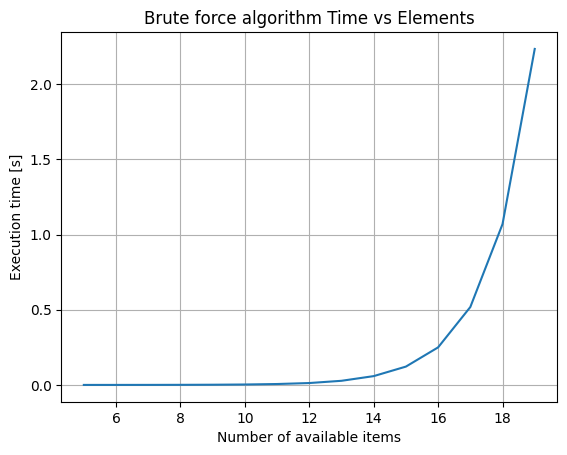

In [11]:
plt.plot(number_of_elements, execution_times)
plt.grid()
plt.ylabel("Execution time [s]")
plt.xlabel("Number of available items")
plt.title("Brute force algorithm Time vs Elements")